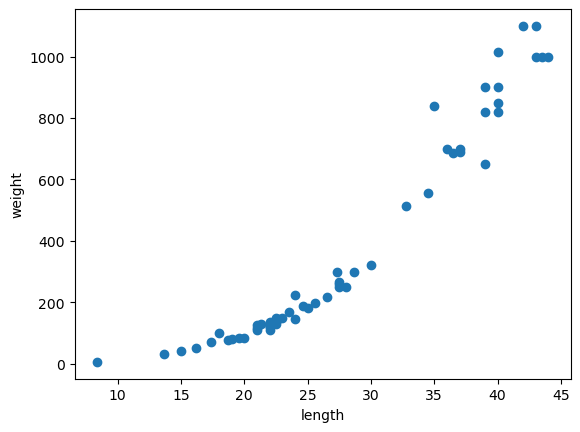

In [ ]:
perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#reshape 사용하여 2차원 넘파이 배열 만들기 연습
import numpy as np
test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(-1,1)
print(test_array)

(4,)
[[1]
 [2]
 [3]
 [4]]


In [ ]:
#왜 아래처럼 생각했지? 틀렸음✅✅
#train_test_split은 결과값을 넘파이로 반환한다고 하는데,, list를 입력했다고 오류남
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input)

AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
#넘파이 배열 변환 후 reshape 적용하여 해결
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

import numpy as np

train_input=np.array(train_input)
test_input=np.array(test_input)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [30]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
#평균절대오차(실제 값과 예측값 사이 오차의 절대값)
#input lenth고 target은 weight임
from sklearn.metrics import mean_absolute_error 

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
#과소적합(underfitting)

knr.score(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

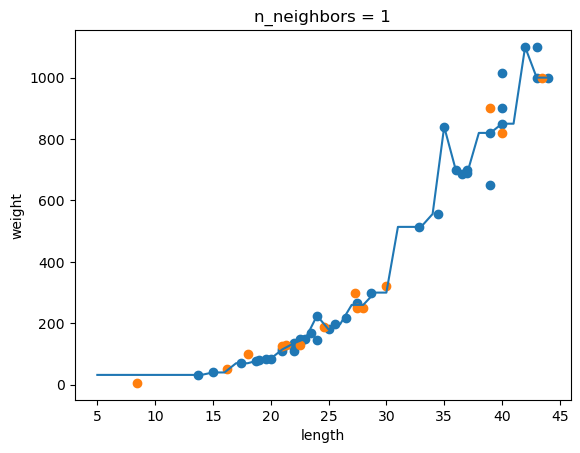

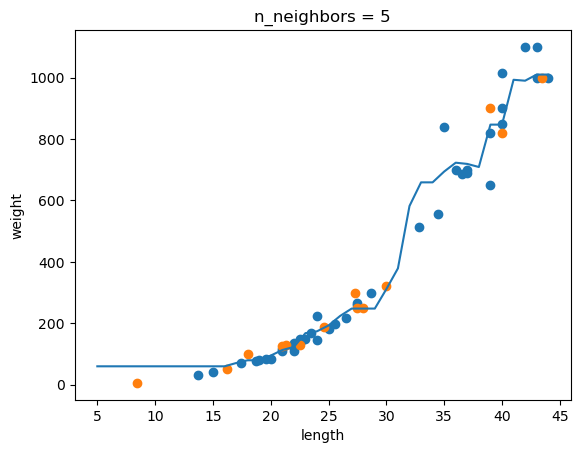

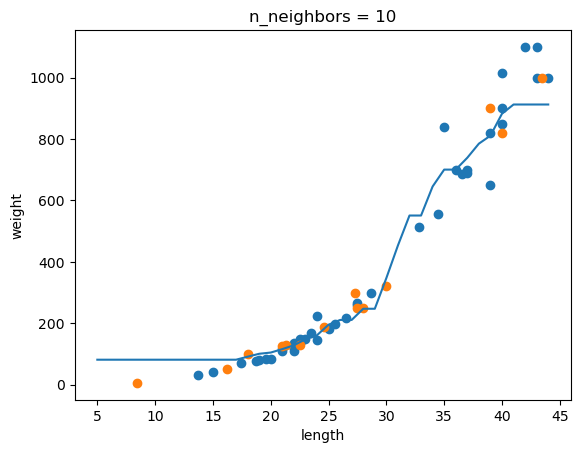

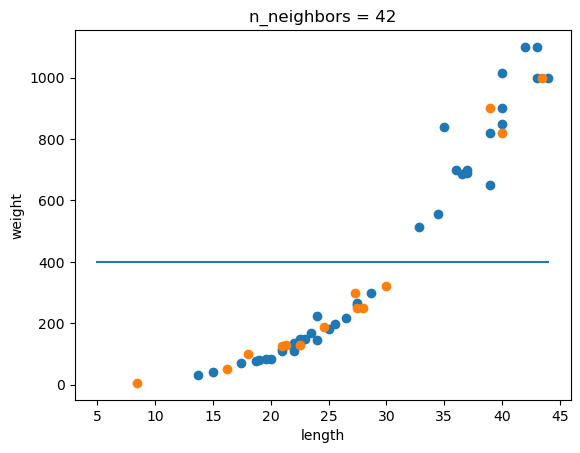

In [ ]:
x= np.arange(5, 45).reshape(-1,1) #예측할 길이의 범위 5~45(45는 사실상 미포함. 그 전까지)

for n in [1,5, 10, 42]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x,prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show() #이웃의 개수가 늘어날수록 곡선이 완만해짐, 42는 매우 과소적합.. 평균치, 이웃 줄이면 과대